Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking

### snippet 2.8

Log evidence      = 0.0
Iterations        = 1:10000
Thinning interval = 1
Chains            = 1
Samples per chain = 10000
parameters        = toss

Empirical Posterior Estimates
───────────────────────────────────────────
parameters
      Mean    SD   Naive SE  MCSE     ESS  
toss 0.6414 0.1345   0.0013 0.0047 816.2831

Quantiles
───────────────────────────────────────────
parameters
      2.5%   25.0%  50.0%  75.0% 97.5%
toss 0.2159 0.5513 0.6491 0.7402 0.974



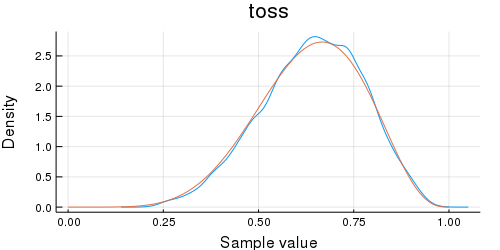

In [2]:
n_samples = 10000
a3d = ones(n_samples,1,1)
w = 6; l = 3; n = w +l
p = [0.5]
for i in 2:n_samples
  p_new = rand(Normal(p[i-1], 0.1), 1)[1]
  if  p_new < 0
    p_new = abs(p_new)
  end
  if p_new > 1
    p_new = 2 - p_new
  end
  q0 = pdf(Binomial(n, p[i-1]), w)
  q1 = pdf(Binomial(n, p_new), w)
  append!(p, [rand(Uniform(0, 1), 1)[1] < q1/q0 ? p_new : p[i-1]])
end

a3d[:, 1, 1] = p
chns = MCMCChains.Chains(a3d, ["toss"])

describe(chns)

plot(chns)

density(chns, lab="Samples")

w = 6; n = 9; x = 0:0.01:1
plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

End of `02/clip-08.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*